# InShorts articles retreival using data mining approaches

### Standard Crisp DM (Cross Industry Standard Process for Data Mining) model

It describes common approaches used by data mining experts around the world and a typical industry standard for any NLP-based problem.
It includes:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment


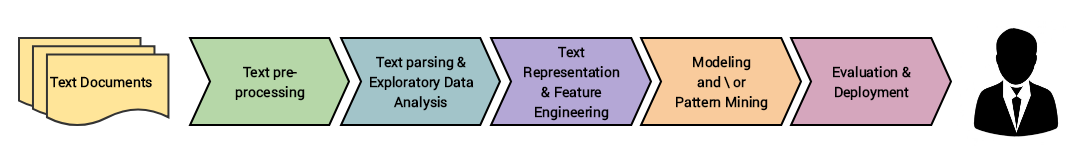

In [46]:
from IPython.display import Image
Image("img/workflow.png")

Final Pipeline be like:

- Getting Corpus(Text Documents)
- Text Pre-processing
- EDA
- Text representation & Feature engineering (Till here is the scope of my project)
- Modelling & Evaluation
- Model Deployment

In [47]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Data Retrieval with Web Scraping

I will be retrieving data from Inshorts news articles using their urls.

For instance lets take three categories:
- Technology
- Sports
- World

In [48]:
start_urls = [
    'https://inshorts.com/en/read/technology',
    'https://inshorts.com/en/read/sports',
    'https://inshorts.com/en/read/world'
]

def create_dataset(start_urls):
    news_data = []
    for url in start_urls:
        news_category = url.split('/')[-1]
        print(news_category)
create_dataset(start_urls)

technology
sports
world


Besides, all the cool kids are doing it. We will leverage the power of **Requests** to make HTTP requests to access and get the HTML content from the landing pages of each of the three news categories. 

> `pip install requests`

Then We shall use **Beautiful Soup** to parse and extract headlines and textual content from the news(by accessing the specific HTML tags and classes, where they are present).

In [49]:
def create_dataset(start_urls):
    news_data = []
    for url in start_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{
            'news_headline': headline.find('span',attrs = {"itemprop":"headline"}).text,
            'news_article': article.find('div',attrs = {"itemprop":"articleBody"}).text,
            'news_category':news_category}
            
            for headline, article in
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
         ]
        news_data.extend(news_articles)
    df = pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [50]:
data_df = create_dataset(start_urls) 
print(data_df.head())

                                       news_headline  \
0  E-commerce platform Shopify to let employees w...   
1  Half of Facebook's employees may work from hom...   
2  SC seeks Centre's reply on plea for ban on Zoo...   
3  Supreme Court agrees to hear petition to ban Z...   
4  Fastest internet speed of 44.2 Tbps recorded, ...   

                                        news_article news_category  
0  After Twitter, Canadian e-commerce website Sho...    technology  
1  Facebook will permanently allow remote work ev...    technology  
2  The Supreme Court on Friday sought Centre's re...    technology  
3  The Supreme Court has agreed to examine whethe...    technology  
4  Researchers from Australia's Monash, Swinburne...    technology  


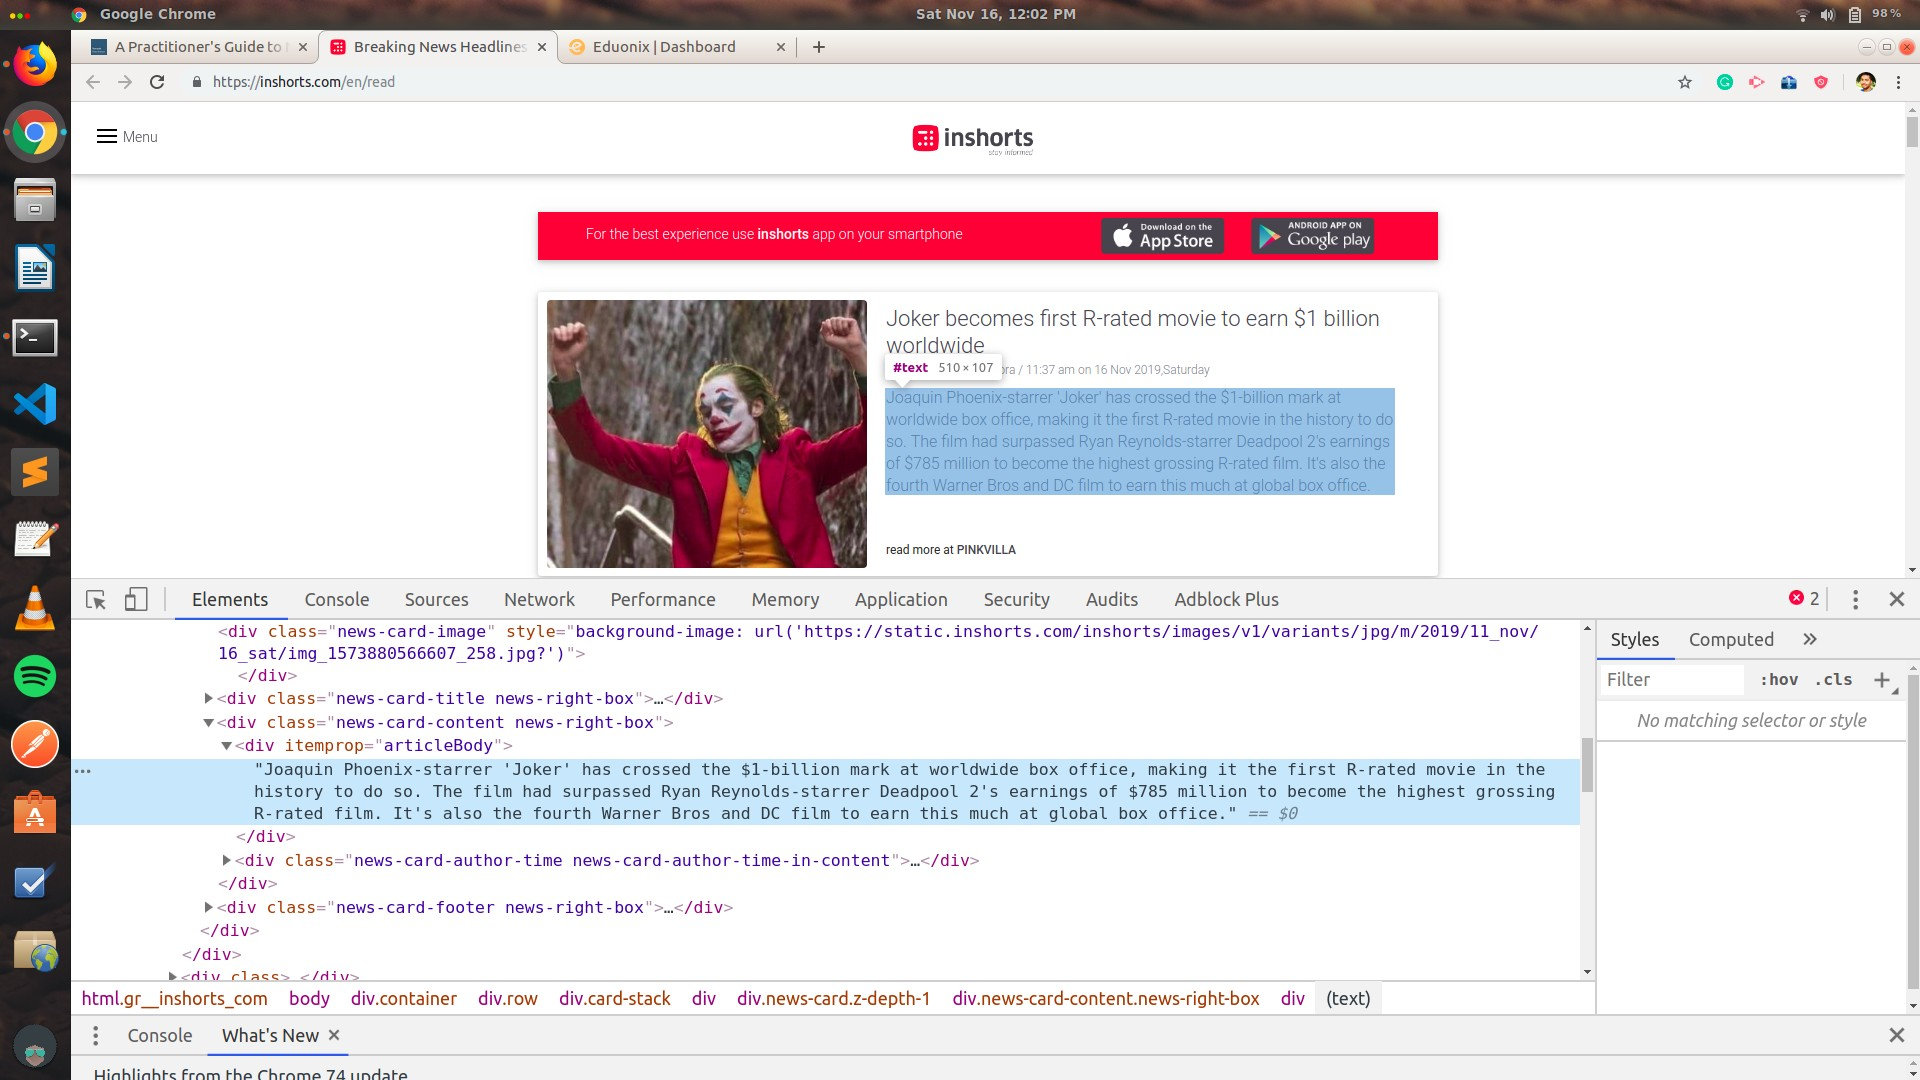

In [51]:
Image("img/scraping.png")

In [52]:
data_df.news_category.value_counts()

technology    25
sports        25
world         24
Name: news_category, dtype: int64

## Text Wrangling & Pre-processing

In [53]:
# Installing Stop words from nltk

import nltk
#nltk.download()

In [54]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata


#nlp = spacy.load('en_core',parse = True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

### We will remove negation words from stop words, since we would want to keep them as they might be useful, especially during sentiment analysis.

In [55]:
def remove_html(text):
    soup = BeautifulSoup(text,'html.parser')
    filtered_text = soup.get_text()
    return filtered_text

remove_html('<h2> HeLLo World </h2><br>')

' HeLLo World '

#### Removing accented characters

In [56]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata

def remove_accent(text):
    text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text
remove_accent('Sómě těxt')

'Some text'

### Expanding our Contractions file

In [57]:
def expand_contractions(text,contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join
                                                   (contraction_mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub(" ' "," ",expanded_text)
    return expanded_text

expand_contractions("We'll have to expand the contractions I'd think")

'We will have to expand the contractions I would think'

#### Removing Special Characters and Digits

In [58]:
def remove_special_characters(text,remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else '[^a-zA-z\s]'
    text = re.sub(pattern,'',text)
    return text

remove_special_characters("It is fun to remove special characters! What do you think? 123#@!",remove_digits=True)

'It is fun to remove special characters What do you think '

### Text Processing: Lemmatization

Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word, but not the root stem.

In [59]:
from nltk.stem.wordnet import WordNetLemmatizer

In [60]:
lem = WordNetLemmatizer()

word = "singing"
    

lem.lemmatize(word,"v")

'sing'

### Text Processing: Stemming

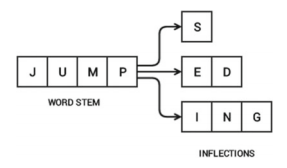

In [61]:
Image("img/stemming.png")

In [62]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("Everyday I do yoga to keep myself fit. I eat unhealthy food after it")

'everyday I do yoga to keep myself fit. I eat unhealthi food after it'

### Removing Stop Words

- Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. 
- These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are a, an, the, and etc.

In [63]:
tokenizer = ToktokTokenizer()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The,is,if,a,and are stopwords, which computer is does not understand")

', , , , stopwords , computer not understand'

## Text Normalizer

Bringing it all together — Building a Text Normalizer

In [64]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = remove_html(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accent(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        #if text_lemmatization:
            #doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Parts of Speech Tagging

In [65]:
from nltk import word_tokenize, pos_tag

In [66]:
text = "I am learning Natural Language Processing, it's fun"

tokens = word_tokenize(text)

print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), (',', ','), ('it', 'PRP'), ("'s", 'VBZ'), ('fun', 'NN')]


### Pre-processing and normalizing the news articles scraped

In [67]:
data_df['full_text'] = data_df["news_headline"].map(str)+'. '+data_df["news_article"]

In [68]:
data_df['clean_text'] = normalize_corpus(data_df['full_text'])
norm_corpus = list(data_df['clean_text'])
data_df.iloc[1][['full_text','clean_text']].to_dict()

{'clean_text': 'half facebooks employees may work home years zuckerberg facebook permanently allow remote work even lockdowns ease ceo mark zuckerberg told employees said company expects half workforce nearly workers work remotely next fiveten years facebook aggressively start remote hiring july take measured approach existing employees based job function performance zuckerberg added',
 'full_text': 'Half of Facebook\'s employees may work from home in 5-10 years: Zuckerberg. Facebook will permanently allow remote work even after lockdowns ease, CEO Mark Zuckerberg told employees. He said the company expects half its workforce of nearly 50,000 workers to work remotely over the next five-ten years. Facebook will "aggressively" start remote hiring from July and take a "measured approach" with existing employees based on job function and performance, Zuckerberg added.'}

## Saving the news articles 

Creating dataset which finally could be used for sentiment analysis.

In [69]:
data_df.to_csv('news.csv',index=False,encoding='UTF-8')

In [70]:
corpus = normalize_corpus(data_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

## Emotion and Sentiment Analyis

Sentiment analysis is perhaps one of the most popular applications of NLP.

The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity.

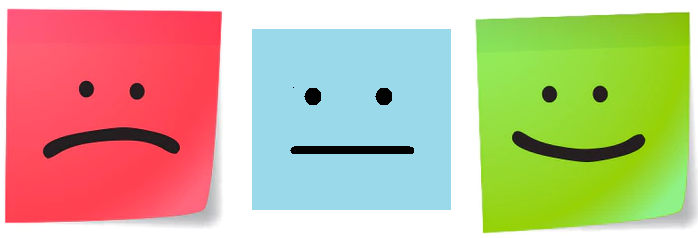

In [81]:
Image("img/sentiments.png")

Various popular lexicons are used for sentiment analysis, including the following.

- AFINN lexicon
- Bing Liu’s lexicon
- MPQA subjectivity lexicon
- SentiWordNet
- VADER lexicon
- TextBlob lexicon

### Sentiment Analysis with AFINN Lexicon

The AFINN lexicon is perhaps one of the simplest and most popular lexicons that can be used extensively for sentiment analysis.

In [72]:
from afinn import Afinn

af = Afinn()

In [73]:
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0
                         else 'negative' if score < 0
                             else 'neutral'
                                 for score in sentiment_scores]

In [74]:
df = pd.DataFrame([list(data_df['news_category']),sentiment_scores,sentiment_category]).T
df.columns = ['news_category','sentiment_score','sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                
                        count      mean       std   min  25%  50%   75%   max
news_category                                                                
sports                   25.0  1.000000  5.986095  -7.0 -3.0  0.0  4.00  14.0
technology               25.0 -0.720000  5.863162 -14.0 -3.0  1.0  3.00   8.0
world                    24.0 -3.166667  5.329709 -15.0 -6.0 -2.5  0.25   5.0

## Visualization

Finally comes the most exciting part: Visualizing the News Sentiment

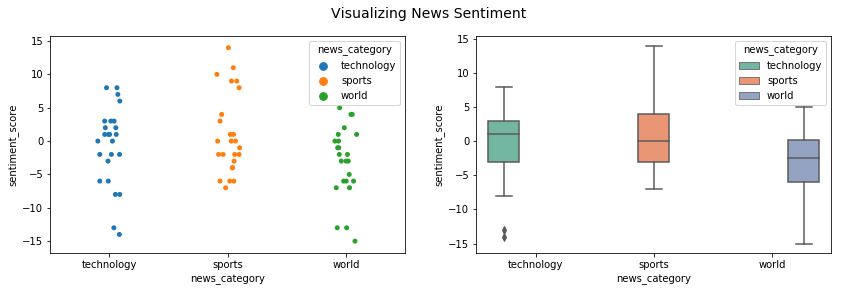

In [75]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
strip_plot = sns.stripplot(x='news_category',y="sentiment_score",
                  hue="news_category",data=df,ax=ax1)
box_plot = sns.boxplot(x='news_category',y="sentiment_score",
                hue="news_category",data=df,palette="Set2",ax=ax2)
t  = f.suptitle('Visualizing News Sentiment',fontsize=14)

/home/codekhal/miniconda3/envs/av/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


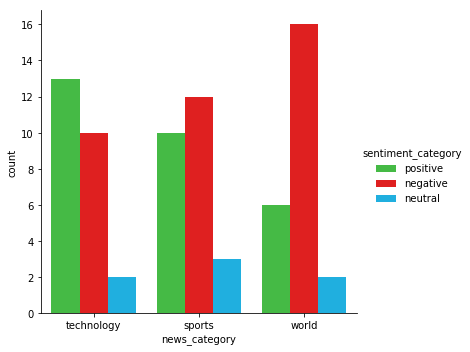

In [76]:
factor_plot = sns.factorplot(x="news_category",hue="sentiment_category",
                            data=df,kind="count",
                            palette={"negative":"#FF0000",
                                    "positive":"#32CD32",
                                    "neutral":"#00BFFF"
                                     })

In [77]:
from textblob import TextBlob

sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity,3) for article in data_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0
                            else 'negative' if score < 0
                                else 'neutral' 
                                     for score in sentiment_scores_tb]

In [78]:
df = pd.DataFrame([list(data_df['news_category']),sentiment_scores_tb,sentiment_category_tb]).T
df.columns = ['news_category','sentiment_score','sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                  \
                        count      mean       std    min    25%    50%    75%   
news_category                                                                   
sports                   25.0 -0.006560  0.208871 -0.417 -0.047  0.000  0.094   
technology               25.0  0.043400  0.151991 -0.225  0.000  0.012  0.121   
world                    24.0  0.021792  0.114893 -0.322  0.000  0.020  0.077   

                      
                 max  
news_category         
sports         0.450  
technology     0.333  
world          0.200

In [79]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.012,positive
1,technology,-0.072,negative
2,technology,0.000,neutral
3,technology,-0.200,negative
4,technology,0.006,positive


/home/codekhal/miniconda3/envs/av/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


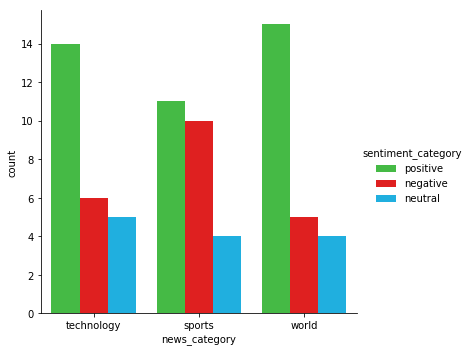

In [80]:
fac_plot = sns.factorplot(x="news_category",hue="sentiment_category",
                         data=df,kind="count",
                         palette={"positive":"#32CD32",
                                  "negative":"#FF0000",
                                    "neutral":"#00BFFF"
                                     })